In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import io

In [2]:
img1 = cv2.imread("people.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)#转换为RGB
img2 = io.imread("people.jpg")

## OpenCV 

[[516  82 148 296]
 [328 124 100 199]
 [235 108  77 154]]
**********
[[0.72650942]
 [1.25140502]
 [0.68567895]]


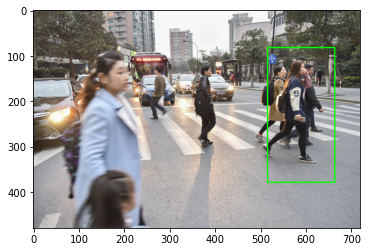

In [3]:
def hog_opencv(img):
    img_copy = img.copy()
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    (rects, weights) = hog.detectMultiScale(img)
    print(rects)
    print('*'*10)
    print(weights)
    (x,y,w,h) = rects[0]
    cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)#框选
    plt.imshow(img_copy)
    plt.show()
hog_opencv(img1)

## skimage

(56, 87, 4, 4, 9)


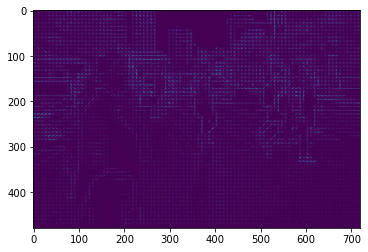

In [5]:
def hog_skimage(img):
    fd, hog_image = hog(img,
                            orientations=9,  # Number of orientation bins.
                            pixels_per_cell=(8, 8),  # Size (in pixels) of a cell.
                            cells_per_block=(4, 4),  # Number of cells in each block.
                            block_norm="L2",
                            feature_vector=False,
                            visualize=True)
    print(fd.shape)
    plt.imshow(hog_image)
    plt.show()
hog_skimage(img2)